# 1. 라이브러리 호출

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # 대체 데이터로 캘리포니아 집값 사용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# 2. 캘리포니아 주택 데이터 호출

In [5]:
# 데이터 로드 (대체로 캘리포니아 주택 데이터 사용)
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3. 학습을 위한 데이터 생성
## 3-1. 데이터 분리를 하는 이유
* train : 학습을 위한 데이터
* validation set : 학습이 이미 완료된 모델을 검증하기 위한 set (중간 점검)
* test set : 학습과 검증이 끝난 모델의 최종 성능 평가용


* **➡️ 모든 데이터를 train으로 주었을 때**
    * 모든 데이터를 train으로 주면 많은 데이터를 학습 시킬 수 있지만 학습시킨 데이터를 모델의 성능 평가에 사용하면 매우 높은 정확도를 보여줍니다. 이는 학습한 데이터에 대한 성능은 좋지만 새로운 데이터가 들어왔을 때 정확도가 높지 않습니다.


* **➡️ train, test로 나눴을 때**
    * 모델을 train으로 학습시키고 평가를 test 데이터로 진행할 수 있게되었습니다. 하지만 처음 만든 모델이 최적의 성능을 보장하지 않습니다. 그렇기에 데이터 전처리, 모델 변경을 통해 모델의 성능을 개선해 가야합니다. 하지만 test 데이터에 대해 모델의 성능을 개선했을 때 이 모델이 반드시 모든 데이터에 대해 좋은 성능을 낸다는 보장이 없습니다.


* **➡️ train, vallidation, test로 나눴을 때**
    * 모델을 train 데이터로 학습시키고 평가를 test 데이터로 진행합니다. 그리고 모델 성능 개선을 위한 데이터 전처리, 모델 변경 등의 작업을 수행하고 이 모델의 성능을 validation 데이터로 평가함으로써 완전히 새로운 데이터을 만든 모델에 평가받아볼 수 있습니다. 이를 통해 새로운 데이터에도 강한 모델을 만들 수 있게됩니다.


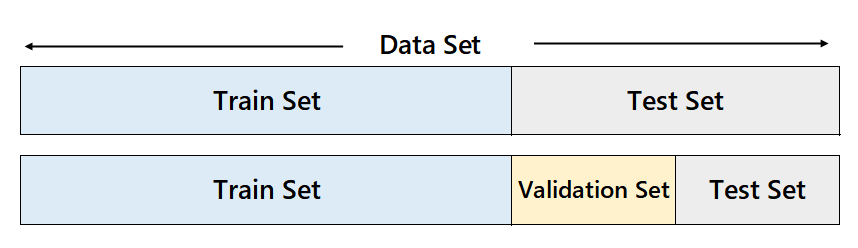

In [6]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 선형모델

In [7]:
# 모델 초기화
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1.0)
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

### 4-1. 선형 회귀

In [8]:
# 선형 회귀
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
print("선형 회귀 MSE:", mean_squared_error(y_test, y_pred_linear))
print("선형 회귀 R2:", r2_score(y_test, y_pred_linear))

선형 회귀 MSE: 0.5558915986952443
선형 회귀 R2: 0.5757877060324508


### 4-2. 규제(Regularization)
* 다중 회귀모델에서는 여러 독립변수들의 각각의 최적의 가중치(기울기)를 찾는 것이 핵심인데 그 방법으로는 규제를 가하는 것입니다.

    1. 설명력이 좋은 변수는 남기고 좋지 않은 변수는 버리는 방식
    2. 규제란 다른 쉬운 말로 변수선택
    3. 과적합 방지
    4. 회귀식을 더 간단하게 만들어 연산 속도를 높이고 일반화를 잘 유도

### 4-2-1. Lasso
* 설명력이 낮은 변수를 <span style="color: #2D3748; background-color:#fff5b1;">0에 가깝게 만드는 것 (특정 변수의 영향력 감소)</span>
* 일부 feature들이 중요하지 않을 때 사용
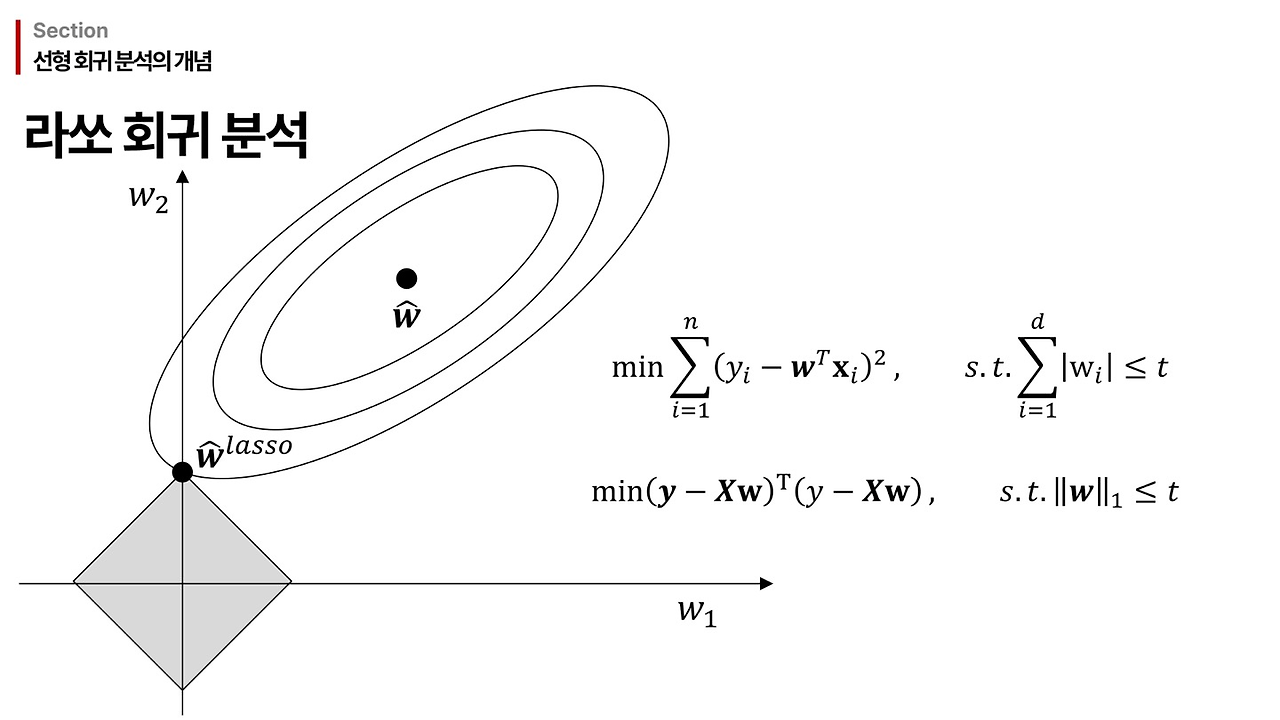
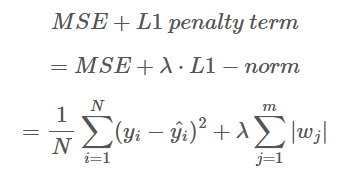

In [10]:
# 라쏘 회귀
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("라쏘 회귀 MSE:", mean_squared_error(y_test, y_pred_lasso))
print("라쏘 회귀 R2:", r2_score(y_test, y_pred_lasso))

라쏘 회귀 MSE: 0.6135115198058131
라쏘 회귀 R2: 0.5318167610318159


### 4-2-2. Ridge
* 설명력이 낮은 변수를 <span style="color: #2D3748; background-color:#fff5b1;">0으로 만드는 것 (특정 변수의 영향력 무력화)</span>
* 일부 Feature는 중요할때 사용
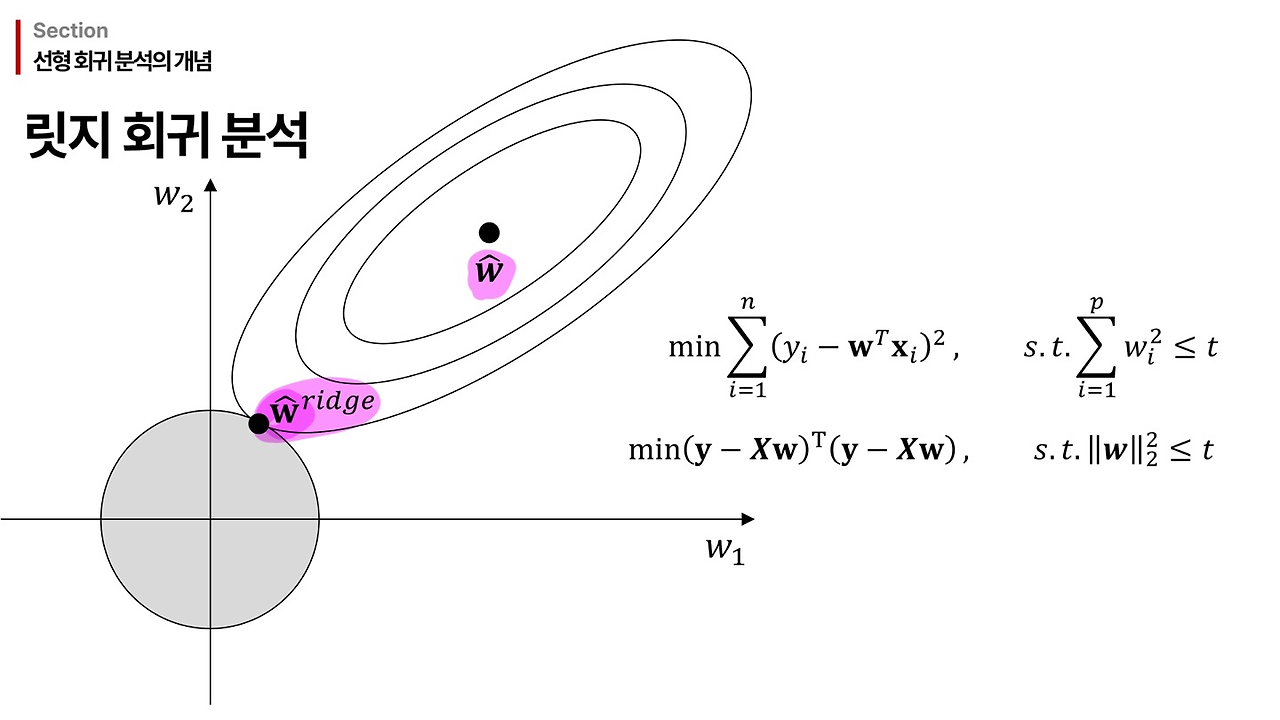
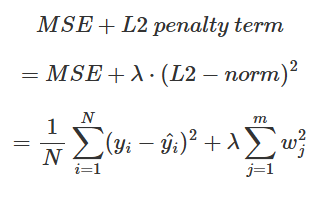

In [9]:
# 릿지 회귀
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("릿지 회귀 MSE:", mean_squared_error(y_test, y_pred_ridge))
print("릿지 회귀 R2:", r2_score(y_test, y_pred_ridge))

릿지 회귀 MSE: 0.5558034669932209
릿지 회귀 R2: 0.5758549611440127


### 4-2-3. Elastic net
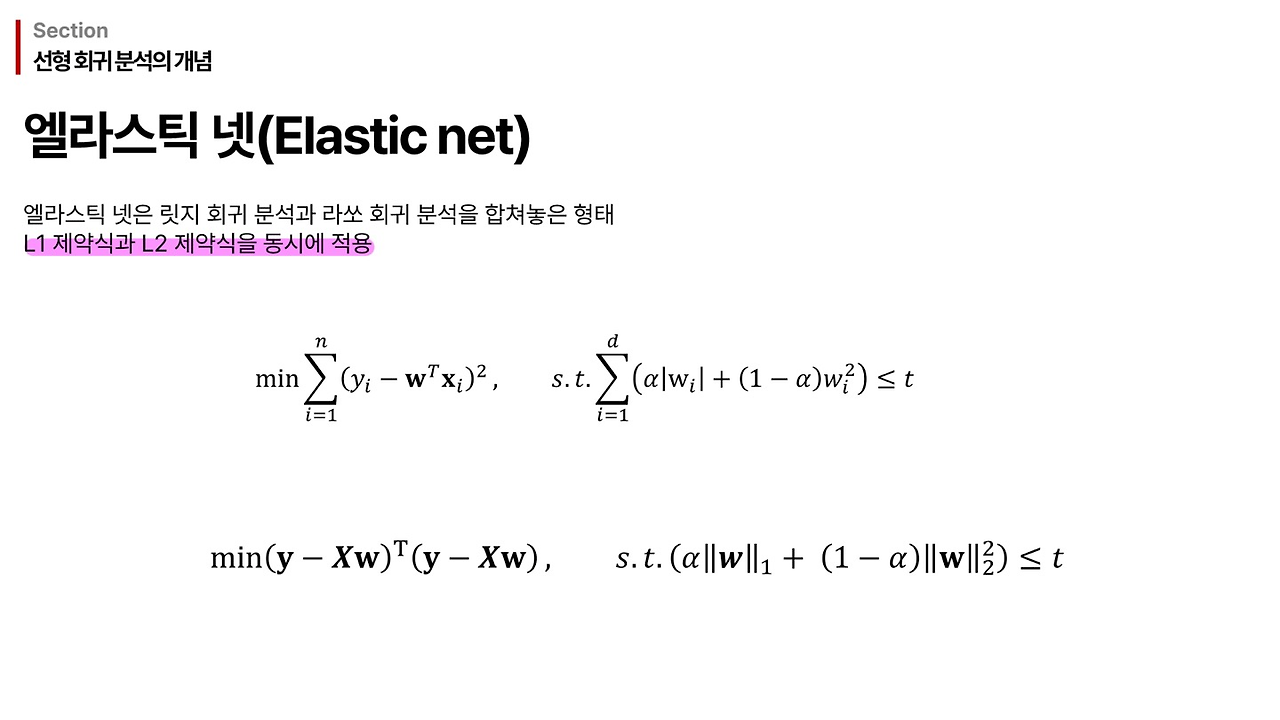
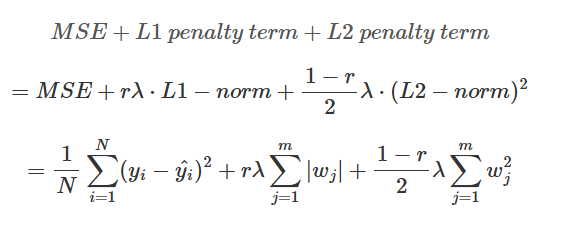


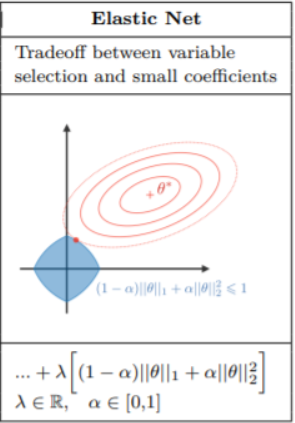

In [11]:
# 엘라스틱넷 회귀
elasticnet_model.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_model.predict(X_test)
print("엘라스틱넷 회귀 MSE:", mean_squared_error(y_test, y_pred_elasticnet))
print("엘라스틱넷 회귀 R2:", r2_score(y_test, y_pred_elasticnet))


엘라스틱넷 회귀 MSE: 0.5730994198028208
엘라스틱넷 회귀 R2: 0.5626560643897964
